In [1]:
import numpy as np
import scipy as sp
from matplotlib.pyplot import *
%matplotlib inline
import sys
sys.path.insert(0,'../PsrSigSim/')
import psrsigsim as PSS

# rcParams['figure.figsize'] = (8.0,5.0)
# rcParams.update({'font.size': 14})

In [2]:
sample_size = 20.48e-3 # in milliseconds
F_samp=1/(sample_size*1e-3)/1e6
ROWS = 20
N_Time_Bins = 2048*ROWS #1.5 Million
Total_time = round(N_Time_Bins*sample_size)
subband = 1.5625 
BW=200
N_freq = BW/subband
print('Total_time',Total_time/1e3)
print('N_freq',N_freq)
print('Sampling Freq:', F_samp)
print('Number of pulses = ',round(Total_time/4.3))

Total_time 0.839
N_freq 128.0
Sampling Freq: 0.048828125
Number of pulses =  195


In [3]:
S1 = PSS.Signal(f0=1400, bw=BW, Nf=N_freq,f_samp=F_samp, ObsTime=Total_time, mode='simulate')

In [4]:
P1 = PSS.Pulsar(S1,period=1/218*1e3,flux=30)

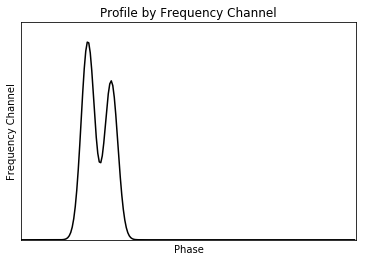

In [5]:
P1.gauss_template(peak=[0.2,0.27],width=[0.02,0.02],amp=[1.0,0.8])
PSS.joy_division_profiles(P1,step=1,N=1)

In [6]:
P1.make_pulses()

1e+02% sampled in 0.54 seconds.

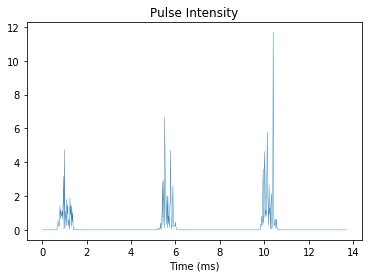

In [7]:
S1.pulse_plot(N_pulses=3,freq_bin =0)

In [8]:
# Number of negative values in a frequency bin
np.sum(np.where(S1.signal[0,:]<0,1,0))

0

In [9]:
ISM1 = PSS.ISM(S1,DM=1)

In [10]:
ISM1.to_DM_Broaden = True

In [11]:
ISM1.finalize_ism()

In [12]:
ISM1.disperse()

98% dispersed in 2.337 seconds.

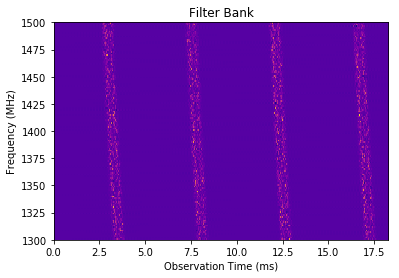

In [13]:
S1.filter_bank(N_pulses=4)

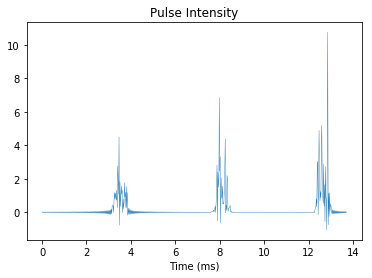

In [14]:
S1.pulse_plot(N_pulses=3,freq_bin =0)

In [15]:
# Number of negative values in a frequency bin
np.sum(np.where(S1.signal[0,:]<0,1,0))

17792

## Use the functions to investigate `shift_t()`

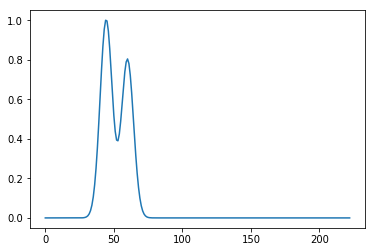

In [16]:
#Define a smooth signal from one of the profiles
s=P1.profile[4,:]
plot(s)
show()

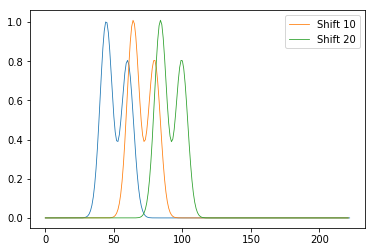

In [17]:
u=PSS.PSS_utils.shift_t(s,20.,dt=1)
v=PSS.PSS_utils.shift_t(s,40.,dt=1)
plot(s,lw=0.8)
plot(u,lw=0.8,label='Shift 10')
plot(v,lw=0.8,label='Shift 20')
#xlim(0,100)
legend(loc='upper right')
show()

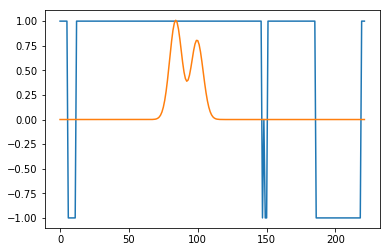

In [18]:
plot(v)
plot(np.sign(v))
show()

shift =  2.45230464661514  time bin size =  0.020479398554969733


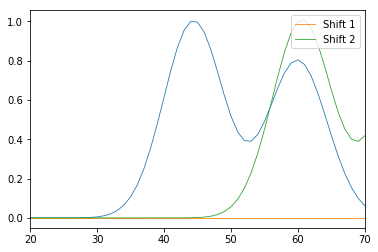

In [19]:
shift = ISM1.time_delays[0]
dt = ISM1.TimeBinSize
print('shift = ', shift, ' time bin size = ', dt)

w=PSS.PSS_utils.shift_t(s,shift,dt=dt)
x=PSS.PSS_utils.shift_t(s,shift*2,dt=dt)

plot(s,lw=0.8)
plot(w,lw=0.8,label='Shift 1')
plot(x,lw=0.8,label='Shift 2')
xlim(20,70)
legend(loc='upper right')
show()

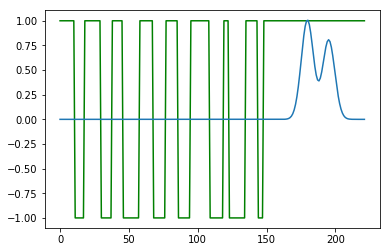

In [27]:
plot(np.sign(x),color='green')
plot(x)
show()

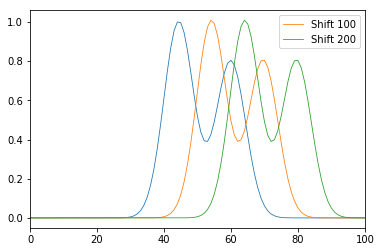

In [21]:
y=PSS.PSS_utils.shift_t(s,100,dt=10)
z=PSS.PSS_utils.shift_t(s,200,dt=10)
plot(s,lw=0.8)
plot(y,lw=0.8,label='Shift 100')
plot(z,lw=0.8,label='Shift 200')
xlim(0,100)
legend(loc='upper right')
show()

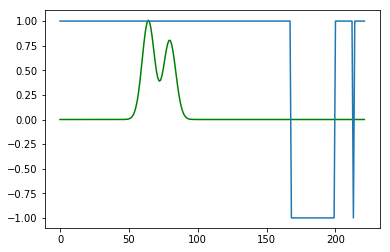

In [28]:
plot(z,color='green')
plot(np.sign(z))
show()